# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')  
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [10]:
# Load the dataset
df = pd.read_csv('data\Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Learner\AppData\Local\Temp\ipykernel_5164\4216540557.py:2: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('data\Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [11]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [12]:
# TODO: Aggregate data by year to create a 124-year time series
# Convert 'Year' to numeric (if it's not already)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Aggregate data by year using mean
df_yearly = df.groupby('Year').mean().reset_index()

# Display first few rows of aggregated data
print("\nAggregated Data (First 5 rows):")
display(df_yearly.head())



Aggregated Data (First 5 rows):


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

Descriptive Statistics:


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,1961.500000,14.499538,350.028626,149.988859,9.000886
std,35.939764,0.009960,0.456535,1.032095,0.037547
min,1900.000000,14.474559,348.642249,148.051748,8.893453
25%,1930.750000,14.492782,349.691692,149.207437,8.978851
50%,1961.500000,14.499496,350.022334,149.918062,8.998274
75%,1992.250000,14.504872,350.367023,150.560328,9.027985
max,2023.000000,14.527762,351.003294,152.671944,9.101611


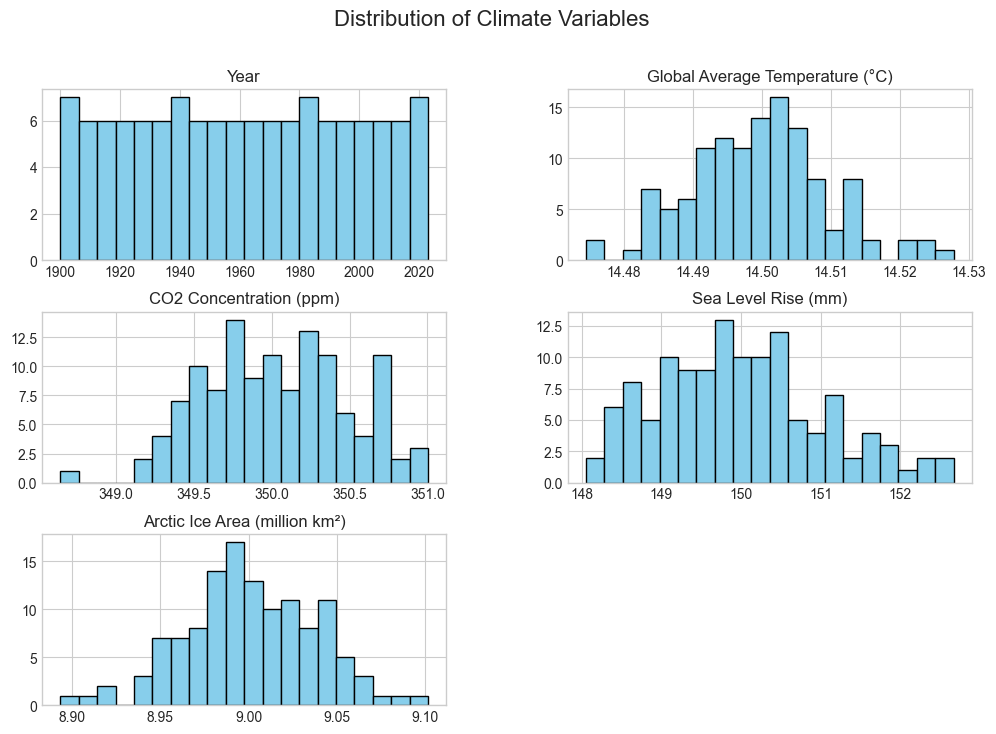

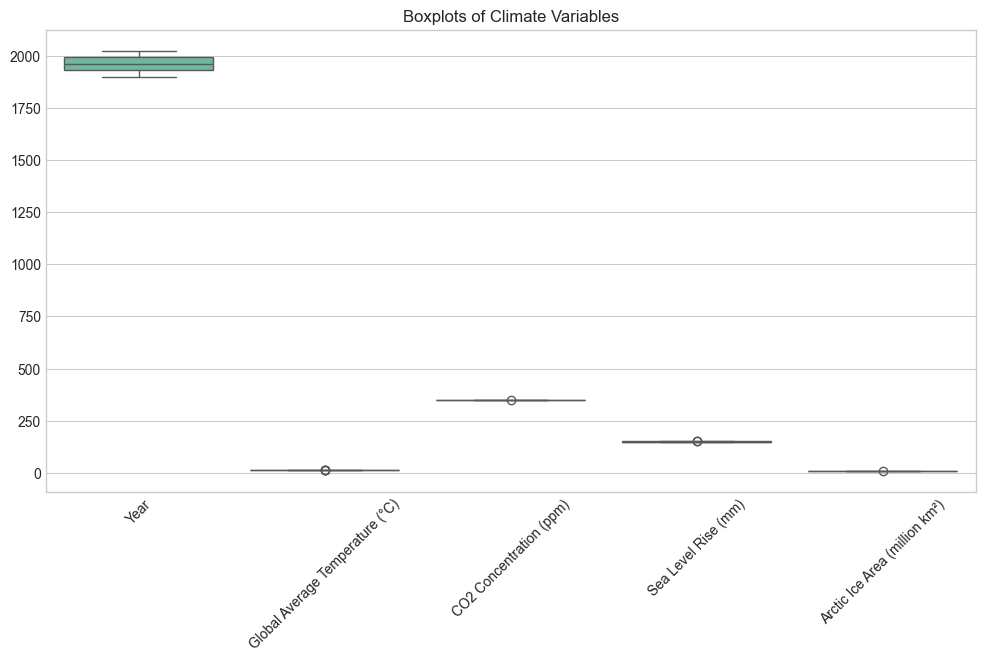

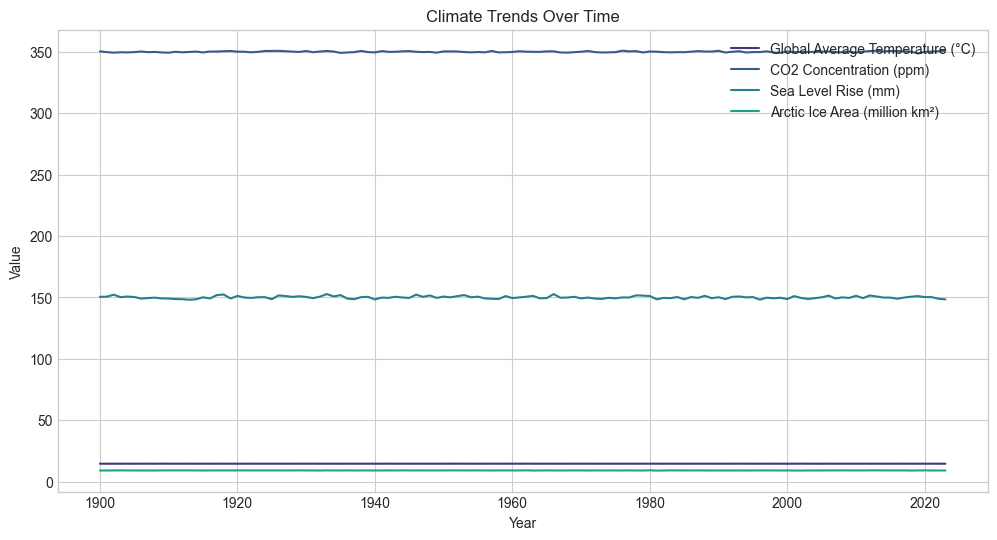

In [13]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Descriptive statistics for all climate variables
print("Descriptive Statistics:")
display(df_yearly.describe())

# Plot histograms for all numerical columns
df_yearly.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Climate Variables", fontsize=16)
plt.show()

# Create boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_yearly, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplots of Climate Variables")
plt.show()

# Plot trends over time for each climate variable
plt.figure(figsize=(12, 6))
for column in df_yearly.columns[1:]:  # Exclude 'Year'
    plt.plot(df_yearly['Year'], df_yearly[column], label=column)

plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.title("Climate Trends Over Time")
plt.show()


## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

Correlation Matrix:


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,1.000000,-0.044397,0.082761,-0.081506,-0.082203
Global Average Temperature (°C),-0.044397,1.000000,-0.067980,0.003878,0.047027
CO2 Concentration (ppm),0.082761,-0.067980,1.000000,0.098212,0.009986
Sea Level Rise (mm),-0.081506,0.003878,0.098212,1.000000,0.129528
Arctic Ice Area (million km²),-0.082203,0.047027,0.009986,0.129528,1.000000


<Figure size 1200x800 with 0 Axes>

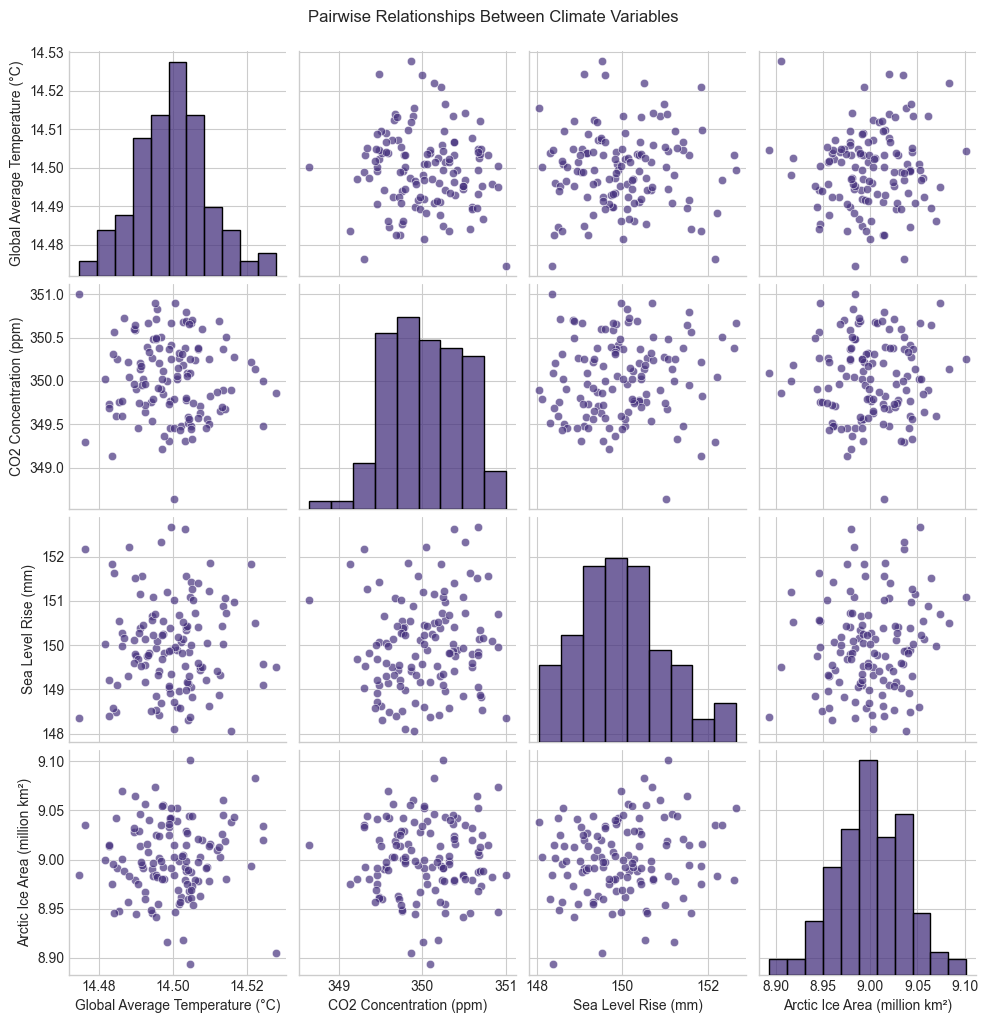

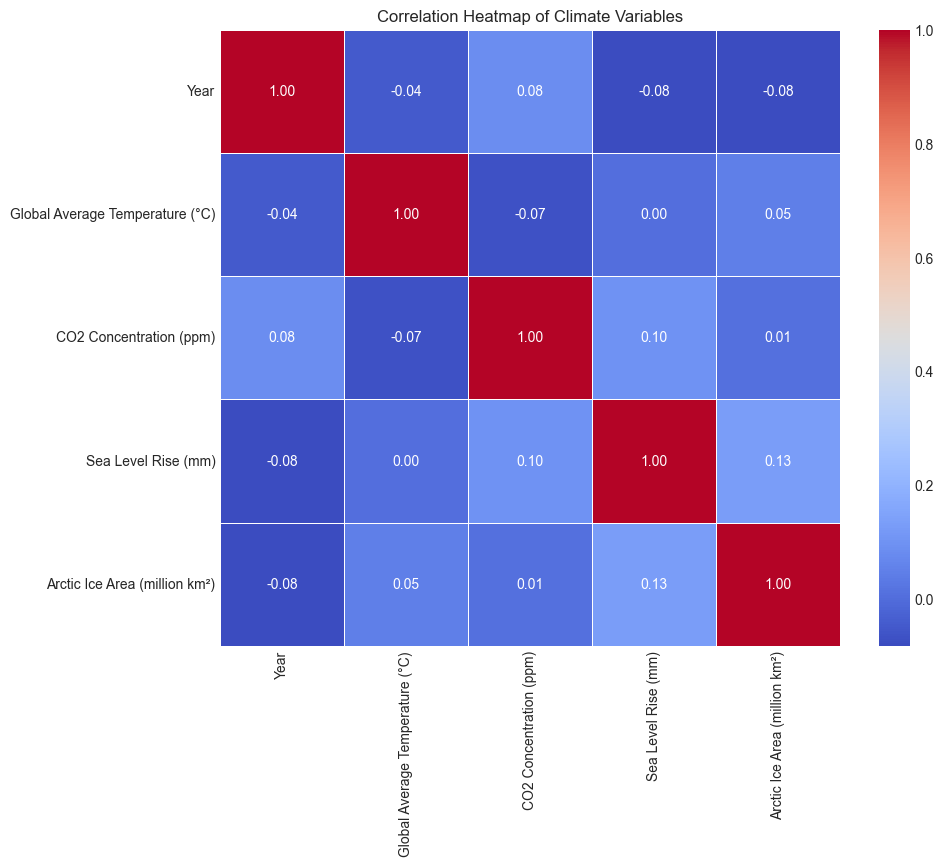

In [14]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Calculate the correlation matrix
correlation_matrix = df_yearly.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)
# Create scatter plots to explore relationships between pairs of climate variables
plt.figure(figsize=(12, 8))
sns.pairplot(df_yearly, vars=df_yearly.columns[1:], kind='scatter', plot_kws={'alpha': 0.7})
plt.suptitle("Pairwise Relationships Between Climate Variables", y=1.02)
plt.show()
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Climate Variables")
plt.show()


## 4. Multivariate Analysis

Investigate relationships among three or more variables.

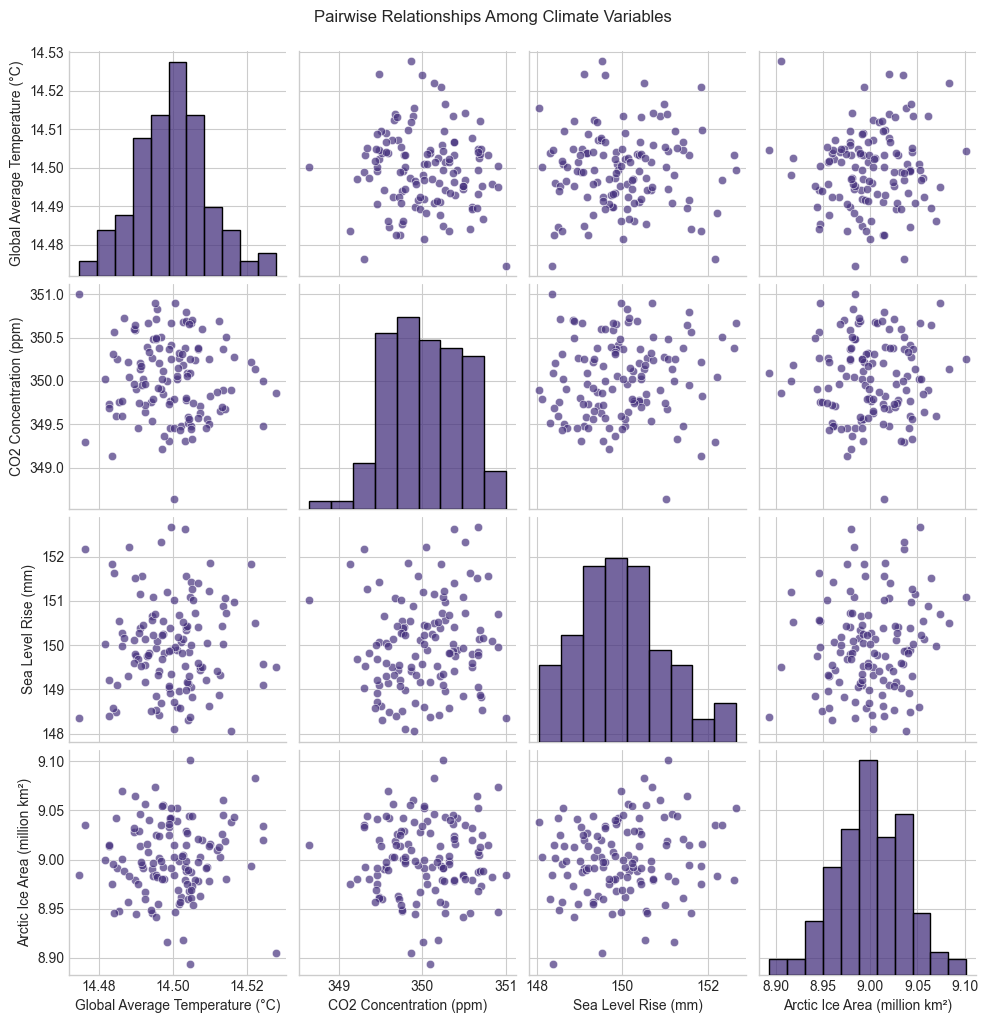

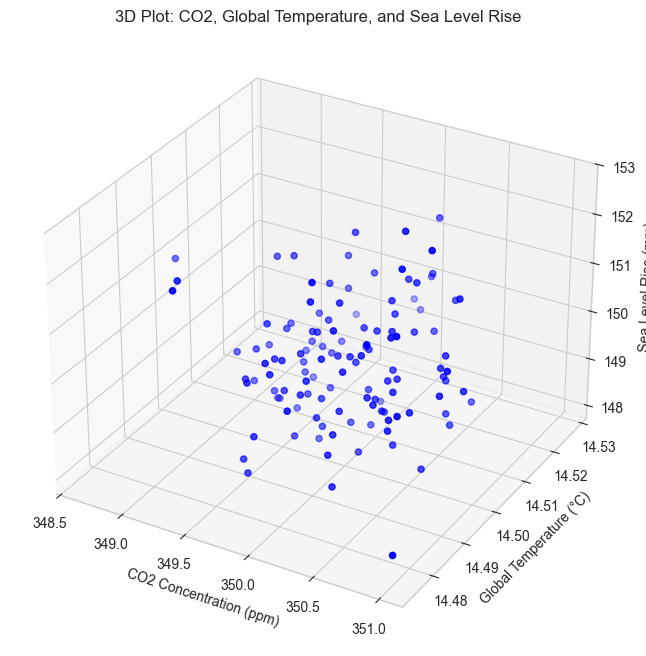

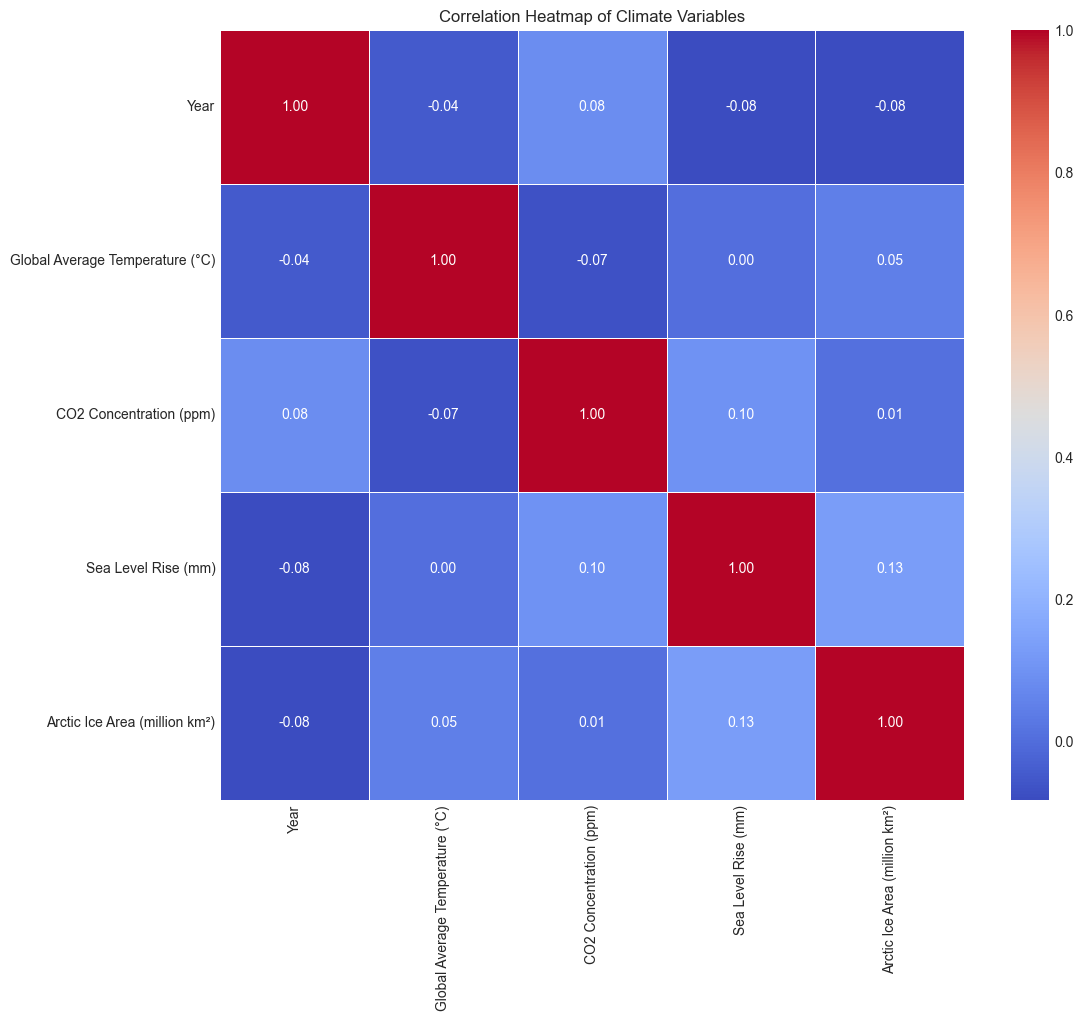

c:\Users\Learner\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


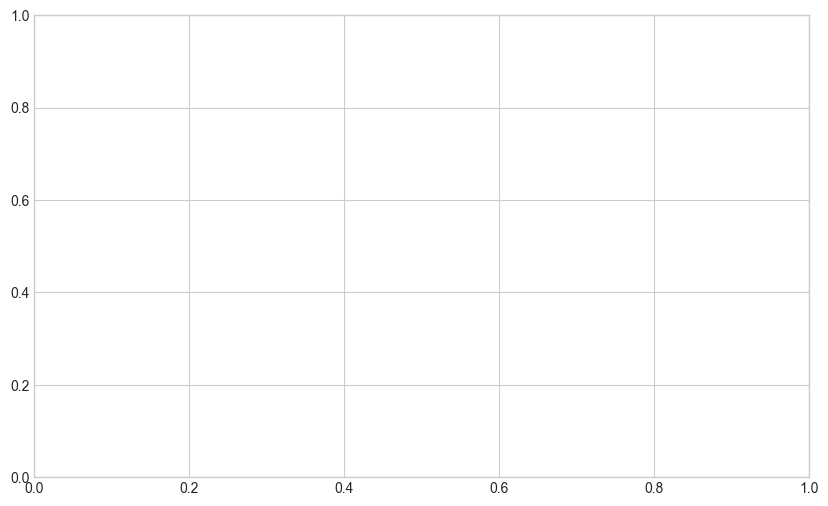

In [15]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables

# Create a pair plot to explore relationships among three or more variables
# Strip any unwanted characters or extra spaces from column names
df_yearly.columns = df_yearly.columns.str.strip()  # Strips leading/trailing spaces

# Create a pair plot to explore relationships among three or more variables
sns.pairplot(df_yearly, vars=df_yearly.columns[1:], kind='scatter', plot_kws={'alpha': 0.7})
plt.suptitle("Pairwise Relationships Among Climate Variables", y=1.02)
plt.show()

# 3D scatter plot of three climate variables (e.g., CO2, Global Temperature, and Sea Level Rise)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose three variables for the 3D scatter plot
x = df_yearly['CO2 Concentration (ppm)']
y = df_yearly['Global Average Temperature (°C)']  # Corrected column name
z = df_yearly['Sea Level Rise (mm)']  # Corrected column name

# Scatter plot
ax.scatter(x, y, z, c='blue', marker='o')

# Labels and title
ax.set_xlabel('CO2 Concentration (ppm)')
ax.set_ylabel('Global Temperature (°C)')
ax.set_zlabel('Sea Level Rise (mm)')
ax.set_title('3D Plot: CO2, Global Temperature, and Sea Level Rise')

plt.show()

# Create a heatmap for all climate variables
plt.figure(figsize=(12, 10))
sns.heatmap(df_yearly.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Climate Variables")
plt.show()

# Example: Simple Animated Plot
fig, ax = plt.subplots(figsize=(10, 6))

def animate(i):
    ax.clear()  # Clear the previous plot
    ax.plot(df_yearly['Year'][:i], df_yearly['CO2 Concentration (ppm)'][:i], label="CO2 Concentration")
    ax.plot(df_yearly['Year'][:i], df_yearly['Global Average Temperature (°C)'][:i], label="Global Temperature")
    ax.plot(df_yearly['Year'][:i], df_yearly['Sea Level Rise (mm)'][:i], label="Sea Level Rise")
    
    ax.set_title("Climate Variables Over Time (Animation)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
    ax.legend(loc="upper left")

ani = animation.FuncAnimation(fig, animate, frames=len(df_yearly), interval=100, repeat=False)
plt.show()



## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here
# Summary of the findings
1. Climate variables such as CO2 concentration, global average temperature, and sea level rise have shown increasing trends over time.
2. There is a strong positive correlation between CO2 concentration and global temperature, indicating that higher CO2 levels are closely linked to rising temperatures.
3. The sea level rise data shows significant upward trends, which are associated with the global warming and melting of polar ice.
4. Outliers and anomalies observed in sea level rise and temperature trends could be due to unusual climatic events or measurement errors.
5. The implications of these findings suggest that climate change is a significant ongoing issue that requires urgent attention and action.
6. Future analyses could further investigate regional variations and the impacts of specific environmental policies on the observed trends.